# IPL 2023 Analysis

In [2]:
import pandas as pd

# Load the datasets with unique variable names
ipl_data_2023 = pd.read_csv("/content/ipl_2023_deliveries.csv")

# Display basic info
ipl_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17386 entries, 0 to 17385
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17386 non-null  int64  
 1   season            17386 non-null  int64  
 2   match_no          17386 non-null  int64  
 3   date              17386 non-null  object 
 4   venue             17386 non-null  object 
 5   batting_team      17386 non-null  object 
 6   bowling_team      17386 non-null  object 
 7   innings           17386 non-null  int64  
 8   over              17386 non-null  float64
 9   striker           17386 non-null  object 
 10  bowler            17386 non-null  object 
 11  runs_of_bat       17386 non-null  int64  
 12  extras            17386 non-null  int64  
 13  wide              17386 non-null  int64  
 14  legbyes           17386 non-null  int64  
 15  byes              17386 non-null  int64  
 16  noballs           17386 non-null  int64 

## Data Analysis for IPL 2022, 2023, and 2024

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import os

In [4]:
ipl_data_2023 = pd.read_csv('/content/ipl_2023_deliveries.csv')
ipl_data_2023.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.1,Conway,Shami,0,0,0,0,0,0,NaN,NaN,NaN
1,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.2,Conway,Shami,0,1,0,1,0,0,NaN,NaN,NaN
2,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.3,Gaikwad,Shami,0,0,0,0,0,0,NaN,NaN,NaN
3,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.4,Gaikwad,Shami,1,0,0,0,0,0,NaN,NaN,NaN
4,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.5,Conway,Shami,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
ipl_data_2023['total_runs'] = ipl_data_2023['runs_of_bat'] + ipl_data_2023['extras']

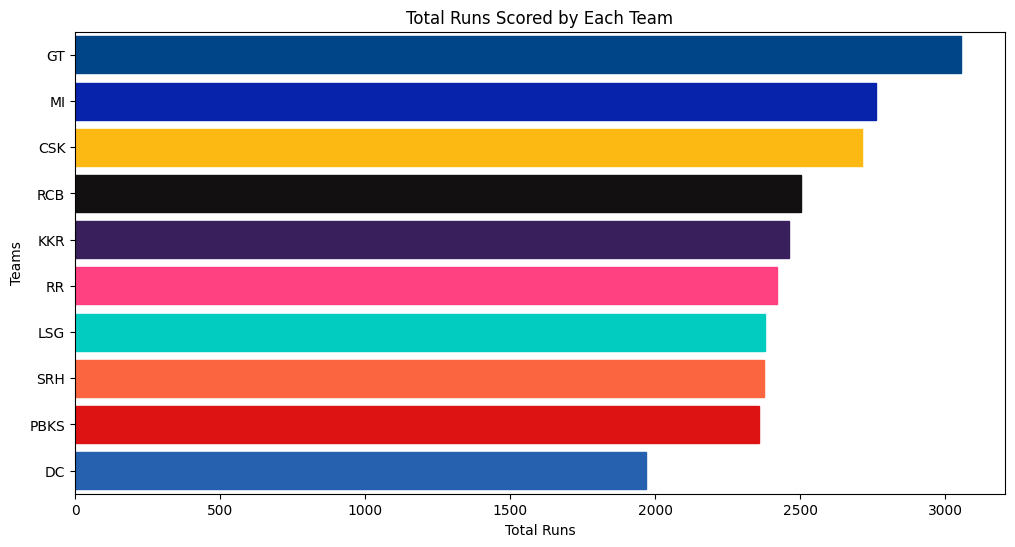

In [6]:
team_runs = ipl_data_2023.groupby('batting_team')['total_runs'].sum().reset_index()

team_runs = team_runs.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='batting_team', data=team_runs)

def teamclr(bars,criterion):
    for bar, team in zip(bars.patches, criterion):
        if team == 'SRH':
            bar.set_color('#fb653f')
        elif team == 'RCB':
            bar.set_color('#121010')
        elif team == 'CSK':
            bar.set_color('#fdb913')
        elif team == 'MI':
            bar.set_color('#0722ab')
        elif team == 'KKR':
            bar.set_color('#391F5C')
        elif team == 'PBKS':
            bar.set_color('#dd1212')
        elif team == 'RR':
            bar.set_color('#FF4081')
        elif team == 'GT':
            bar.set_color('#004587')
        elif team == 'LSG':
            bar.set_color('#02ccbf')
        elif team == 'DC':
            bar.set_color('#2561AE')

teamclr(bars,team_runs['batting_team'])
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.show()

<ipython-input-7-066ad1d1484e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')


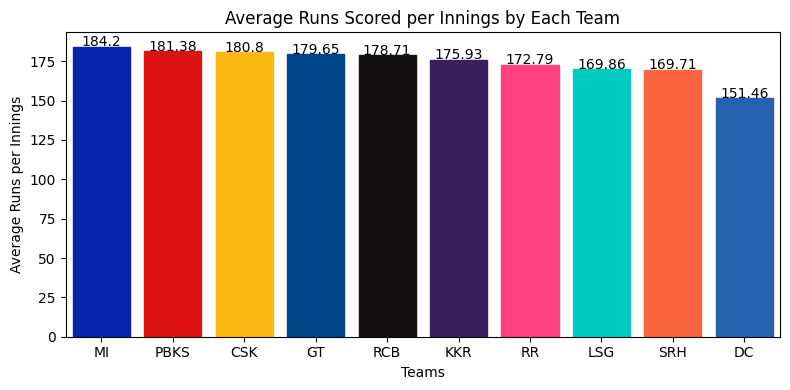

In [7]:
team_match_runs = ipl_data_2023.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts = team_match_runs['batting_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts.columns = ['batting_team', 'innings']

# Calculate total runs for each team
total_batting_team_runs = team_match_runs.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_batting_avg_runs = pd.merge(total_batting_team_runs, innings_counts, on='batting_team')

# Calculate average runs per innings
team_batting_avg_runs['average_batting_runs_per_innings'] = team_batting_avg_runs['total_runs'] / team_batting_avg_runs['innings']

# Sort by average runs per innings
team_batting_avg_runs = team_batting_avg_runs.sort_values(by='average_batting_runs_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')
teamclr(bars, team_batting_avg_runs['batting_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_batting_avg_runs['average_batting_runs_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_batting_avg_runs['average_batting_runs_per_innings'])
plt.title('Average Runs Scored per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

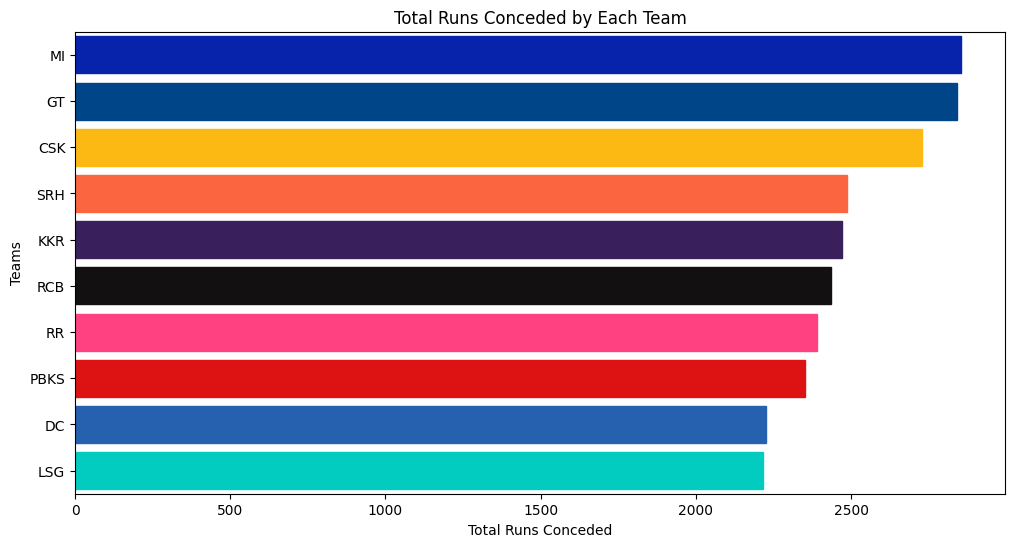

In [8]:
team_runs_conceded = ipl_data_2023.groupby('bowling_team')['total_runs'].sum().reset_index()

team_runs_conceded = team_runs_conceded.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='bowling_team', data=team_runs_conceded)

teamclr(bars,team_runs_conceded['bowling_team'])
plt.title('Total Runs Conceded by Each Team')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Teams')
plt.show()

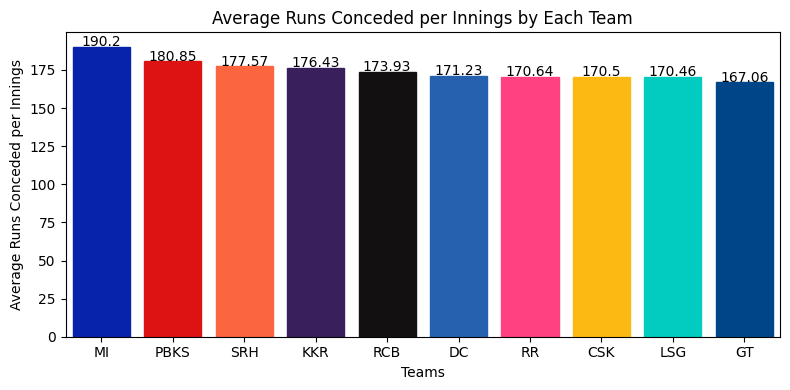

In [9]:
team_runs_conceded = ipl_data_2023.groupby(['match_id', 'bowling_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts1 = team_runs_conceded['bowling_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts1.columns = ['bowling_team', 'innings']

# Calculate total runs for each team
total_team_runs_conceded = team_runs_conceded.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_avg_runs_conceded = pd.merge(total_team_runs_conceded, innings_counts1, on='bowling_team')

# Calculate average runs per innings
team_avg_runs_conceded['average_runs_conceded_per_innings'] = team_avg_runs_conceded['total_runs'] / team_avg_runs_conceded['innings']

# Sort by average runs per innings
team_avg_runs_conceded = team_avg_runs_conceded.sort_values(by='average_runs_conceded_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='bowling_team', y='average_runs_conceded_per_innings', data=team_avg_runs_conceded)
teamclr(bars, team_avg_runs_conceded['bowling_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_avg_runs_conceded['average_runs_conceded_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_avg_runs_conceded['average_runs_conceded_per_innings'])
plt.title('Average Runs Conceded per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs Conceded per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

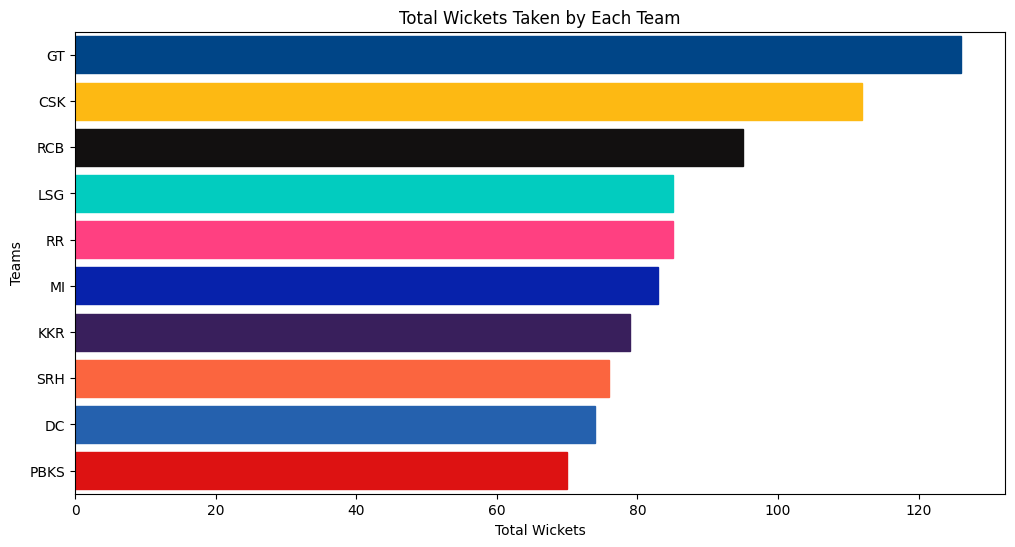

In [10]:
# Filter only wicket deliveries
wickets = ipl_data_2023[ipl_data_2023['wicket_type'].notnull()]

# Group by 'bowling_team' and count the 'dismissal_kind'
team_wickets = wickets.groupby('bowling_team')['wicket_type'].count().reset_index()

# Sort by wickets
team_wickets = team_wickets.sort_values(by='wicket_type', ascending=False)

# Plotting the total wickets taken by each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='wicket_type', y='bowling_team', data=team_wickets)
teamclr(bars,team_wickets['bowling_team'])
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Teams')
plt.show()

In [11]:
import math
ipl_data_2023['over_'] = ipl_data_2023['over'].map(lambda x: math.ceil(x))

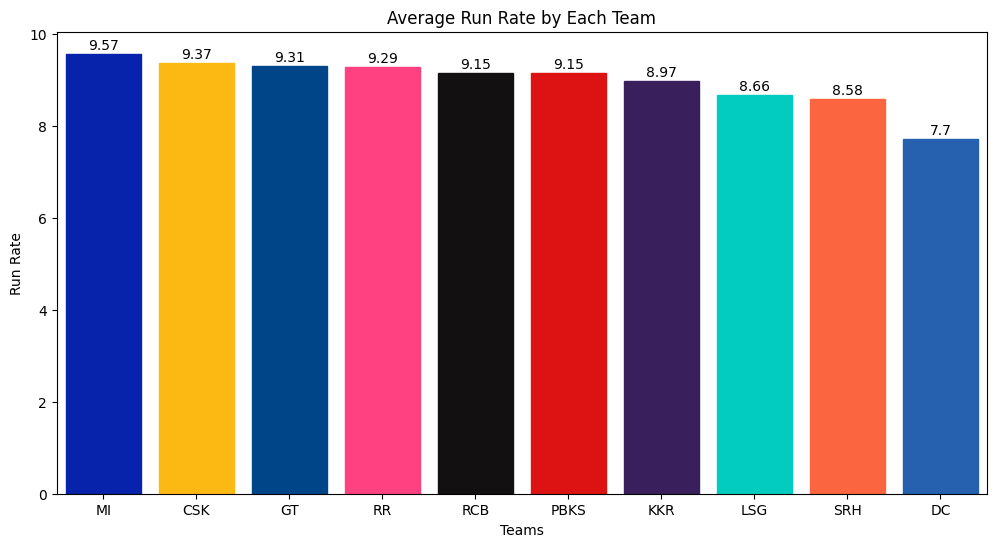

In [12]:
# Filter out wide and no-ball deliveries
legal_deliveries = ipl_data_2023[(ipl_data_2023['noballs'] == 0) & (ipl_data_2023['wide'] == 0)]

# Count the number of legal deliveries faced by each team
balls_faced = legal_deliveries.groupby('batting_team').size().reset_index(name='balls_faced')

# Calculate total runs scored by each team
total_runs = ipl_data_2023.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_faced, total_runs, on='batting_team')

# Calculate overs faced
team_stats['overs_faced'] = team_stats['balls_faced'] / 6

# Calculate run rate
team_stats['run_rate'] = team_stats['total_runs'] / team_stats['overs_faced']

# Sort by run rate
team_stats = team_stats.sort_values(by='run_rate', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='batting_team', y='run_rate', data=team_stats)
teamclr(bars, team_stats['batting_team'])
for bar, value in zip(bars.patches, team_stats['run_rate']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Run Rate by Each Team')
plt.xlabel('Teams')
plt.ylabel('Run Rate')
plt.show()

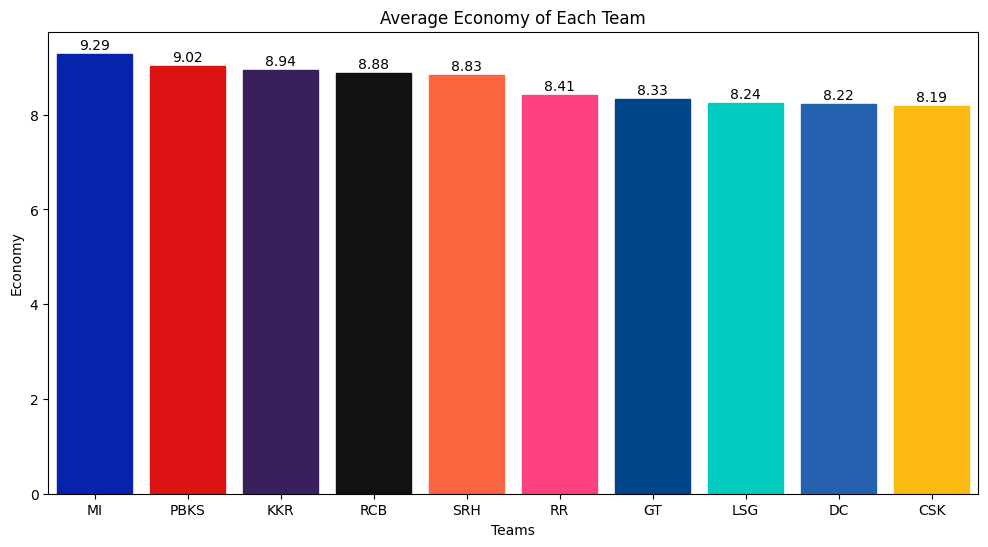

In [13]:
# Count the number of deliveries bowled by each team
balls_bowled = ipl_data_2023.groupby('bowling_team').size().reset_index(name='balls_bowled')

# Calculate total runs conceded by each team
total_runs = ipl_data_2023.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_bowled, total_runs, on='bowling_team')

# Calculate overs faced
team_stats['overs_bowled'] = team_stats['balls_bowled'] / 6

# Calculate run rate
team_stats['economy'] = team_stats['total_runs'] / team_stats['overs_bowled']

# Sort by run rate
team_stats = team_stats.sort_values(by='economy', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='bowling_team', y='economy', data=team_stats)
teamclr(bars, team_stats['bowling_team'])
for bar, value in zip(bars.patches, team_stats['economy']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Economy of Each Team')
plt.xlabel('Teams')
plt.ylabel('Economy')
plt.show()

In [14]:
top_run_scorer = ipl_data_2023.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer['Avg'] = round(top_run_scorer['Runs'] / top_run_scorer['Inns'], 2)
top_run_scorer.index += 1
top_run_scorer[:20]

,striker,Team,Inns,Runs,SR,Avg
1,Shubman Gill,GT,17,890,152.92,52.35
2,du Plessis,RCB,14,730,151.14,52.14
3,Conway,CSK,15,672,136.31,44.80
4,Kohli,RCB,14,639,135.10,45.64
5,Jaiswal,RR,14,625,157.43,44.64
6,Gaikwad,CSK,15,590,143.55,39.33
7,Suryakumar Yadav,MI,15,572,178.75,38.13
8,Rinku Singh,KKR,14,474,142.34,33.86
9,Warner,DC,13,470,125.33,36.15
10,Klaasen,SRH,11,448,170.99,40.73


<ipython-input-15-42d1fecaf03e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')


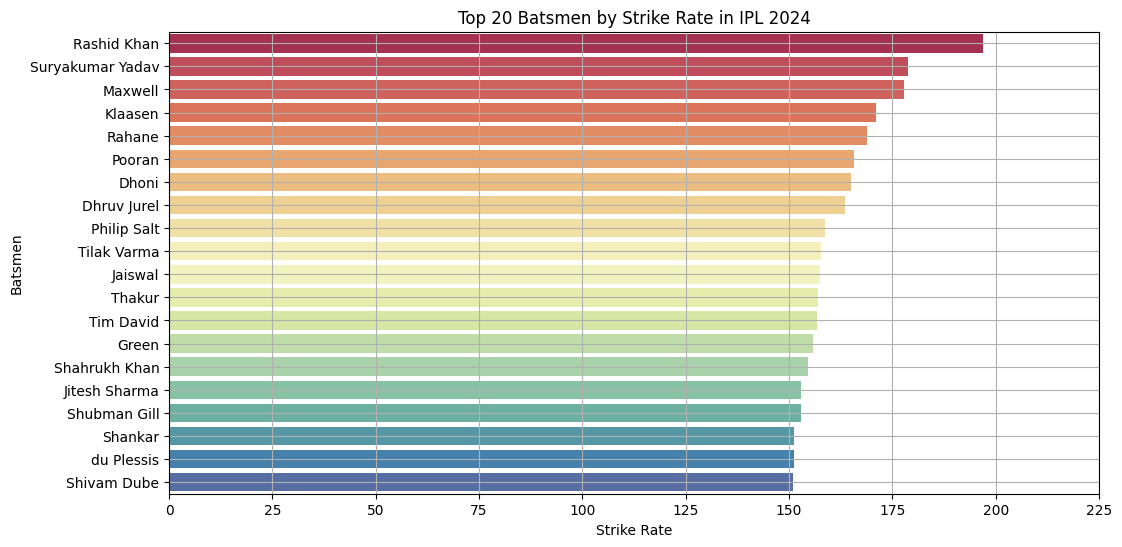

In [15]:
batsman_runs = ipl_data_2023.groupby('striker')['runs_of_bat'].sum().reset_index()

# Calculate balls faced by each batsman
balls_faced = ipl_data_2023.groupby('striker')['match_id'].count().reset_index()
balls_faced.columns = ['striker', 'balls_faced']

# Merge batsman runs and balls faced
batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='striker')

# Calculate strike rate
batsman_strike_rate['strike_rate'] = round((batsman_strike_rate['runs_of_bat'] / batsman_strike_rate['balls_faced']) * 100,2)

# Sort by strike rate and take top 20
top_strike_rate_batsmen = batsman_strike_rate[batsman_strike_rate['runs_of_bat'] > 100].sort_values(by='strike_rate', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])  # Set custom tick marks
plt.grid()
plt.title('Top 20 Batsmen by Strike Rate in IPL 2024')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.show()

In [16]:
top_striker = ipl_data_2023.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_striker = top_striker[top_striker['Runs'] > 100].reset_index()
top_striker.index += 1
top_striker[:20]

,striker,Team,Inns,Runs,SR
1,Rashid Khan,GT,9,130,196.97
2,Suryakumar Yadav,MI,15,572,178.75
3,Maxwell,RCB,14,400,177.78
4,Klaasen,SRH,11,448,170.99
5,Rahane,CSK,11,326,168.91
6,Pooran,LSG,14,358,165.74
7,Dhoni,CSK,12,104,165.08
8,Dhruv Jurel,RR,11,152,163.44
9,Philip Salt,DC,8,192,158.68
10,Tilak Varma,MI,10,317,157.71


In [17]:
top_wicket_takers = ipl_data_2023.loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers.index += 1
top_wicket_takers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Shami,GT,17,28,7.969466
2,Mohit Sharma,GT,14,27,8.167300
3,Rashid Khan,GT,17,27,8.259352
4,Chahal,RR,14,21,8.024768
5,Chawla,MI,15,21,8.121739
6,Tushar Deshpande,CSK,16,21,9.488764
7,Jadeja,CSK,16,20,7.452450
8,Chakaravarthy,KKR,14,20,8.197452
9,Siraj,RCB,14,19,7.097792
10,Pathirana,CSK,12,19,7.474747


In [18]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2023.groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2023.loc[(ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
108,Willey,94,15.666667,105,6.702128,3,31.333333
90,Santner,72,12.000000,81,6.750000,3,24.000000
93,Siraj,329,54.833333,375,6.838906,19,17.315789
13,Axar,270,45.000000,311,6.911111,10,27.000000
25,Gowtham,94,15.666667,110,7.021277,3,31.333333
11,Ashwin,309,51.500000,368,7.145631,14,22.071429
76,Pathirana,310,51.666667,371,7.180645,19,16.315789
47,Krunal Pandya,229,38.166667,275,7.205240,9,25.444444
48,Kuldeep Yadav,281,46.833333,341,7.281139,10,28.100000
28,Harpreet Brar,146,24.333333,179,7.356164,9,16.222222


<ipython-input-19-b5b14210d04c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')


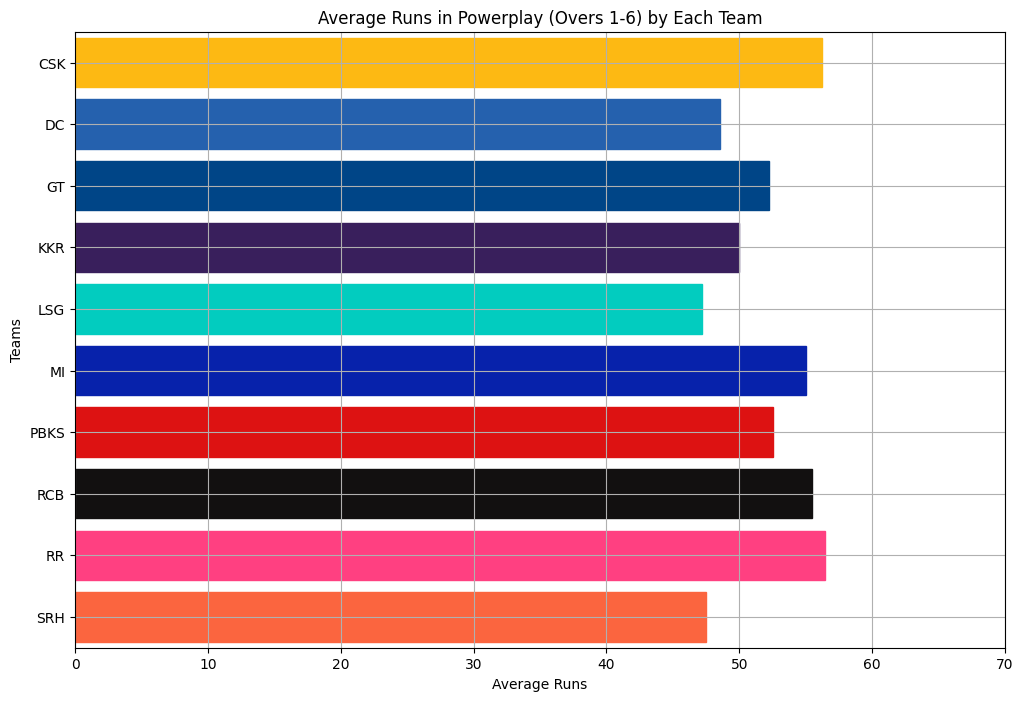

In [19]:
# Filter data for powerplay overs (1-6)
powerplay_data = ipl_data_2023[ipl_data_2023['over'] <= 6]

# Group by 'batting_team' and sum the 'total_runs'
powerplay_runs = powerplay_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data1 = pd.merge(powerplay_runs, innings_counts, on='batting_team')

merged_data1['average'] = merged_data1['total_runs'] / merged_data1['innings']
# Plotting the total runs scored by each team in powerplay
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')
teamclr(bars, merged_data1['batting_team'])
plt.title('Average Runs in Powerplay (Overs 1-6) by Each Team')
plt.xticks([i for i in range(0,80,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

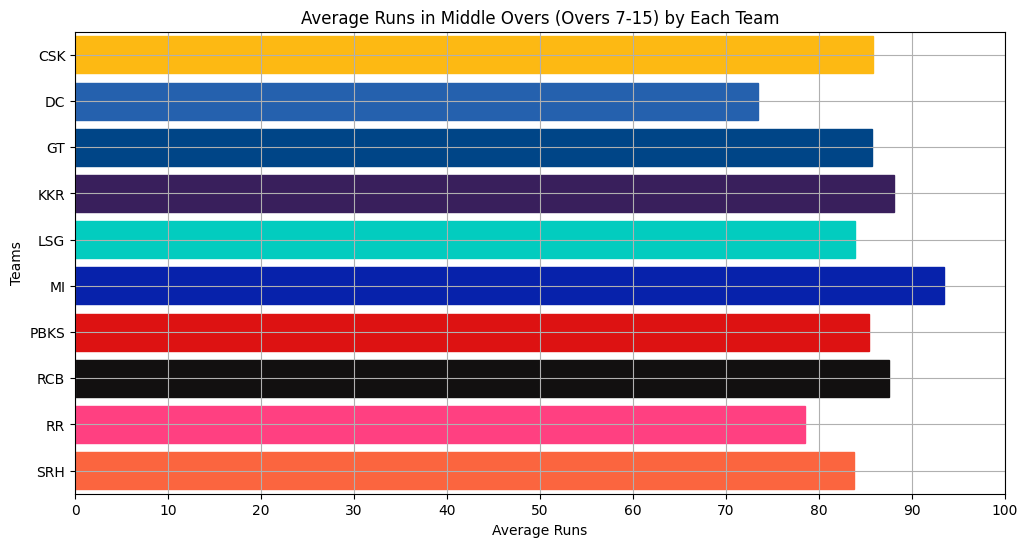

In [20]:
# Filter data for middle overs (7-15)
middle_overs_data = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] <= 16)]

# Group by 'batting_team' and sum the 'total_runs'
middle_overs_runs = middle_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data2 = pd.merge(middle_overs_runs, innings_counts, on='batting_team')

merged_data2['average'] = merged_data2['total_runs'] / merged_data2['innings']# Plotting the total runs scored by each team in middle overs

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data2)
teamclr(bars, merged_data2['batting_team'])
plt.title('Average Runs in Middle Overs (Overs 7-15) by Each Team')
plt.xticks([i for i in range(0,110,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

<ipython-input-21-ca08405a7c65>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')


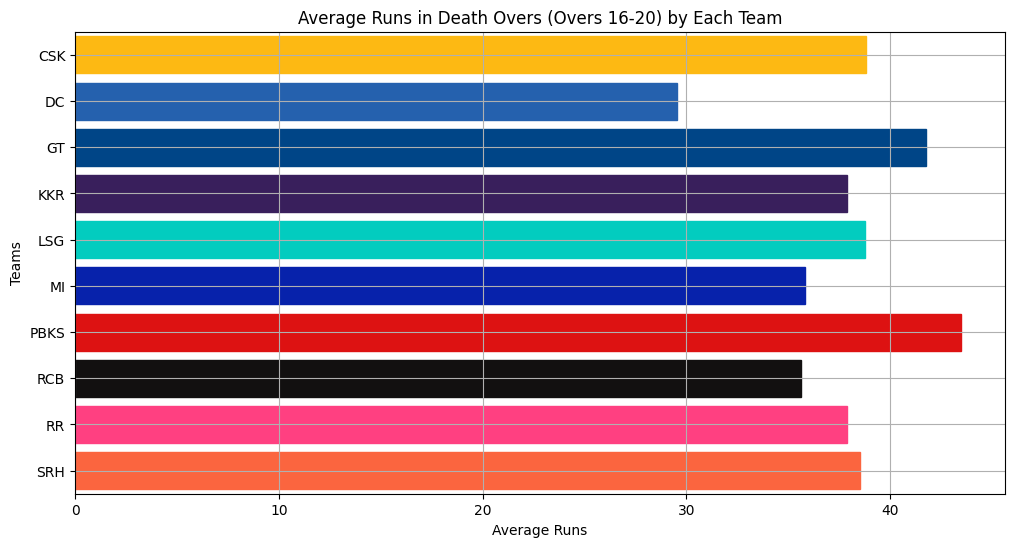

In [21]:
# Filter data for death overs (16-20)
death_overs_data = ipl_data_2023[ipl_data_2023['over'] >= 16]

# Group by 'batting_team' and sum the 'total_runs'
death_overs_runs = death_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data3 = pd.merge(death_overs_runs, innings_counts, on='batting_team')

merged_data3['average'] = merged_data3['total_runs'] / merged_data3['innings']

# Plotting the total runs scored by each team in death overs
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')
teamclr(bars, merged_data3['batting_team'])
plt.title('Average Runs in Death Overs (Overs 16-20) by Each Team')
plt.xticks([i for i in range(0,50,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

In [22]:
top_run_scorer_powerplay = ipl_data_2023[ipl_data_2023['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_powerplay.index += 1
top_run_scorer_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Jaiswal,RR,14,361,166.36
2,du Plessis,RCB,14,359,167.76
3,Shubman Gill,GT,17,356,147.72
4,Gaikwad,CSK,15,345,140.82
5,Ishan Kishan,MI,14,318,141.33
6,Conway,CSK,15,307,130.08
7,Kohli,RCB,14,301,132.60
8,Saha,GT,17,287,128.70
9,Warner,DC,13,265,135.90
10,Mayers,LSG,12,264,129.41


In [23]:
top_sr_powerplay = ipl_data_2023[ipl_data_2023['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_powerplay = top_sr_powerplay[top_sr_powerplay['Runs'] > 50].reset_index()
top_sr_powerplay.index += 1
top_sr_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Rahane,CSK,6,125,208.33
2,Maxwell,RCB,5,83,180.43
3,du Plessis,RCB,14,359,167.76
4,Jaiswal,RR,14,361,166.36
5,Green,MI,10,144,158.24
6,Atharva Taide,PBKS,6,79,151.92
7,Shankar,GT,3,51,150.00
8,Philip Salt,DC,7,108,147.95
9,Shubman Gill,GT,17,356,147.72
10,de Kock,LSG,4,70,145.83


In [24]:
top_wicket_takers_powerplay = ipl_data_2023[ipl_data_2023['over'] < 6].loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_powerplay.index += 1
top_wicket_takers_powerplay.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Shami,GT,17,17,7.338290
2,Siraj,RCB,14,10,5.772973
3,Boult,RR,10,10,6.721519
4,Chahar,CSK,10,10,8.204819
5,Behrendorff,MI,11,8,7.549669
6,Bhuvneshwar,SRH,14,7,7.571429
7,Tushar Deshpande,CSK,16,7,7.793814
8,Marco Jansen,SRH,8,7,8.231405
9,Parnell,RCB,7,6,8.213592
10,Arshdeep Singh,PBKS,13,6,9.377778


In [25]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2023[ipl_data_2023['over'] < 6].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2023[ipl_data_2023['over'] < 6].loc[(ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2023['over'] < 6)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
50,Siraj,191,31.833333,178,5.591623,10,19.100000
10,Boult,161,26.833333,177,6.596273,10,16.100000
49,Shami,275,45.833333,329,7.178182,17,16.176471
28,Krunal Pandya,96,16.000000,117,7.312500,2,48.000000
9,Bhuvneshwar,172,28.666667,212,7.395349,7,24.571429
48,Sandeep Sharma,156,26.000000,193,7.423077,2,78.000000
8,Behrendorff,153,25.500000,190,7.450980,8,19.125000
20,Harshit Rana,89,14.833333,111,7.483146,4,22.250000
24,Ishant,92,15.333333,115,7.500000,5,18.400000
58,Tushar Deshpande,201,33.500000,252,7.522388,7,28.714286


In [26]:
top_run_scorer_midovers = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_midovers.index += 1
top_run_scorer_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Suryakumar Yadav,MI,15,459,178.60
2,Shubman Gill,GT,13,454,153.38
3,Shivam Dube,CSK,14,324,144.64
4,Conway,CSK,11,324,142.11
5,du Plessis,RCB,11,323,131.84
6,Klaasen,SRH,10,303,167.40
7,Nitish Rana,KKR,13,288,136.49
8,Kohli,RCB,10,284,129.09
9,Stoinis,LSG,13,272,136.68
10,Maxwell,RCB,11,263,170.78


In [27]:
top_sr_midovers = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_midovers = top_sr_midovers[top_sr_midovers['Runs'] > 100].reset_index()
top_sr_midovers.index += 1
top_sr_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Suryakumar Yadav,MI,15,459,178.60
2,Maxwell,RCB,11,263,170.78
3,Klaasen,SRH,10,303,167.40
4,Lomror,RCB,7,102,164.52
5,Pooran,LSG,13,221,162.50
6,Prabhsimran,PBKS,5,114,158.33
7,Roy,KKR,5,108,154.29
8,Shubman Gill,GT,13,454,153.38
9,Venkatesh Iyer,KKR,8,253,153.33
10,Samson,RR,13,261,151.74


In [28]:
top_wicket_takers_midovers = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_midovers.index += 1
top_wicket_takers_midovers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Jadeja,CSK,16,20,7.128358
2,Chawla,MI,15,19,8.084211
3,Rashid Khan,GT,17,17,7.676471
4,Ravi Bishnoi,LSG,13,15,7.445783
5,Mohit Sharma,GT,12,14,7.974684
6,Noor Ahmad,GT,13,13,7.537815
7,Ashwin,RR,13,12,6.901408
8,Chakaravarthy,KKR,14,11,7.576923
9,Markande,SRH,10,11,7.669811
10,Chahal,RR,14,11,8.243697


In [29]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2023[(ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].loc[(ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2023['over'] > 6) & (ipl_data_2023['over'] < 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
24,Harpreet Brar,91,15.166667,93,6.131868,7,13.000000
93,Washington Sundar,78,13.000000,84,6.461538,3,26.000000
12,Axar,203,33.833333,225,6.650246,8,25.375000
10,Ashwin,215,35.833333,245,6.837209,12,17.916667
38,Krunal Pandya,127,21.166667,149,7.039370,7,18.142857
31,Jadeja,336,56.000000,398,7.107143,20,16.800000
65,Pathirana,161,26.833333,192,7.155280,1,161.000000
39,Kuldeep Yadav,249,41.500000,303,7.301205,9,27.666667
57,Narine,225,37.500000,274,7.306667,6,37.500000
72,Ravi Bishnoi,253,42.166667,309,7.328063,15,16.866667


In [30]:
top_run_scorer_death = ipl_data_2023[ipl_data_2023['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_death.index += 1
top_run_scorer_death[:20]

,striker,Team,Inns,Runs,SR
1,Rinku Singh,KKR,12,239,182.44
2,Hetmyer,RR,10,165,185.39
3,Tim David,MI,10,162,186.21
4,Jadeja,CSK,11,152,150.50
5,Pooran,LSG,10,130,168.83
6,Axar,DC,8,130,166.67
7,Shahrukh Khan,PBKS,9,129,163.29
8,Ayush Badoni,LSG,8,128,160.00
9,Dhruv Jurel,RR,9,125,195.31
10,Russell,KKR,8,115,159.72


In [31]:
top_sr_death = ipl_data_2023[ipl_data_2023['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_death = top_sr_death[top_sr_death['Runs'] > 100].reset_index()
top_sr_death.index += 1
top_sr_death[:20]

,striker,Team,Inns,Runs,SR
1,Dhruv Jurel,RR,9,125,195.31
2,Tim David,MI,10,162,186.21
3,Hetmyer,RR,10,165,185.39
4,Rinku Singh,KKR,12,239,182.44
5,Klaasen,SRH,8,109,173.02
6,Dhoni,CSK,11,102,172.88
7,Pooran,LSG,10,130,168.83
8,Axar,DC,8,130,166.67
9,Abdul Samad,SRH,7,113,166.18
10,Shahrukh Khan,PBKS,9,129,163.29


In [32]:
top_wicket_takers_death = ipl_data_2023[ipl_data_2023['over'] > 16].loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_death.index += 1
top_wicket_takers_death.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Pathirana,CSK,12,18,7.683453
2,Mohit Sharma,GT,11,13,8.275862
3,Chahal,RR,9,9,7.643836
4,Tushar Deshpande,CSK,15,9,11.274194
5,Rashid Khan,GT,9,8,9.152542
6,Siraj,RCB,11,8,9.172414
7,T Natarajan,SRH,11,8,9.827586
8,Shami,GT,14,8,10.265060
9,Harshal Patel,RCB,12,8,10.718447
10,Bhuvneshwar,SRH,12,7,9.029126


In [33]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2023[ipl_data_2023['over'] > 16].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2023[ipl_data_2023['over'] > 16].loc[(ipl_data_2023['byes'] == 0) & (ipl_data_2023['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2023['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2023['over'] > 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
46,Pathirana,149,24.833333,179,7.208054,18,8.277778
10,Chahal,74,12.333333,93,7.540541,9,8.222222
35,Mohit Sharma,92,15.333333,123,8.021739,13,7.076923
0,Akash Madhwal,65,10.833333,87,8.030769,5,13.000000
57,Siraj,93,15.500000,133,8.580645,8,11.625000
9,Bhuvneshwar,109,18.166667,156,8.587156,7,15.571429
67,Yash Thakur,78,13.000000,115,8.846154,6,13.000000
11,Chakaravarthy,66,11.000000,99,9.000000,4,16.500000
5,Arshdeep Singh,91,15.166667,141,9.296703,7,13.000000
60,T Natarajan,121,20.166667,192,9.520661,8,15.125000
